<a href="https://colab.research.google.com/github/yoosukyeong/Machine_Learning_basic/blob/main/Kmeans%EB%A1%9C_%EA%B3%A0%EA%B0%9D_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/yoosukyeong/Machine_Learning_basic/main/data/customer.csv')

In [3]:
data.head()

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240454 entries, 0 to 240453
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   cc_num    240454 non-null  int64  
 1   category  240454 non-null  object 
 2   amt       240454 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.5+ MB


In [5]:
data.describe()

,cc_num,amt
count,2.404540e+05,240454.000000
mean,3.365543e+17,69.758079
std,1.191447e+18,150.060270
min,6.049559e+10,1.000000
25%,2.131124e+14,9.740000
50%,2.720433e+15,47.530000
75%,4.642255e+15,82.950000
max,4.956829e+18,21437.710000


In [6]:
data['cc_num'].nunique()

100

In [7]:
data['cc_num'].value_counts()

4642255475285942       4386
4512828414983801773    4384
6534628260579800       4383
180048185037117        4382
3553629419254918       4381
                       ... 
3511058278399773        738
3592325941359225        738
4767265376804500        736
630412733309            736
38859492057661          735
Name: cc_num, Length: 100, dtype: int64

In [8]:
data = data.groupby(['cc_num', 'category']).sum().reset_index()

In [9]:
data.head()

,cc_num,category,amt
0,60495593109,entertainment,3169.74
1,60495593109,food_dining,4043.46
2,60495593109,gas_transport,5076.36
3,60495593109,grocery,7576.58
4,60495593109,health_fitness,1631.22


In [10]:
len(data)

1100

In [11]:
data = pd.pivot_table(data, index = 'cc_num', columns = 'category', values = 'amt')

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns, index = data.index)

In [15]:
data.head()

category,entertainment,food_dining,gas_transport,grocery,health_fitness,home,kids_pets,misc,personal_care,shopping,travel
cc_num,,,,,,,,,,,
60495593109,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796


In [16]:
from sklearn.cluster import KMeans

In [17]:
inertia_list = []

for k in range(2, 10):
    km = KMeans(n_clusters = k)
    km.fit(data)
    inertia_list.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

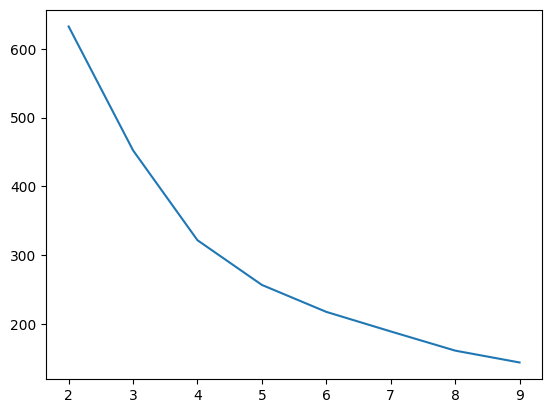

In [18]:
sns.lineplot(x = range(2,10), y = inertia_list)

In [19]:
from sklearn.metrics import silhouette_score

In [23]:
silhouette_score_list = []

for k in range(2, 10):
    km = KMeans(n_clusters = k)
    km.fit(data)
    pred = km.predict(data)
    silhouette_score_list.append(silhouette_score(data, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [24]:
silhouette_score_list

[0.3621058466676178,
 0.36786702378191044,
 0.4244589983654803,
 0.38841135144898814,
 0.35262665212658734,
 0.3532152924626045,
 0.369427664082272,
 0.37688513996678163]

<Axes: >

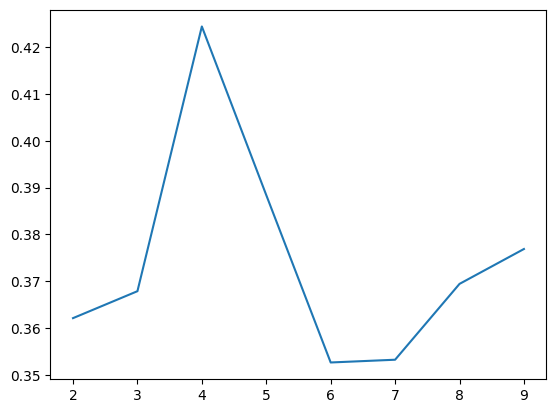

In [25]:
sns.lineplot(x = range(2,10), y = silhouette_score_list)

In [26]:
km = KMeans(n_clusters = 4)
km.fit(data)
pred = km.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
data['label'] = pred

In [29]:
data.head()

category,entertainment,food_dining,gas_transport,grocery,health_fitness,home,kids_pets,misc,personal_care,shopping,travel,label
cc_num,,,,,,,,,,,,
60495593109,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,1
571365235126,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,2
571465035400,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,0
630412733309,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,1
630423337322,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,2


In [31]:
data.groupby('label').mean()

category,entertainment,food_dining,gas_transport,grocery,health_fitness,home,kids_pets,misc,personal_care,shopping,travel
label,,,,,,,,,,,
0,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970
1,-0.826826,-0.820264,-0.807530,-0.746914,-1.037601,-0.943190,-1.017107,-0.788890,-0.903252,-0.760563,-0.266604
2,0.043536,0.071197,0.868891,0.032581,0.356233,0.220808,0.524956,0.235603,0.341387,-0.070841,-0.264840
3,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740


In [32]:
data.groupby('label').count()

category,entertainment,food_dining,gas_transport,grocery,health_fitness,home,kids_pets,misc,personal_care,shopping,travel
label,,,,,,,,,,,
0,8,8,8,8,8,8,8,8,8,8,8
1,36,36,36,36,36,36,36,36,36,36,36
2,46,46,46,46,46,46,46,46,46,46,46
3,10,10,10,10,10,10,10,10,10,10,10
